Automatic AutoRegressive Integrated Moving Average (Auto ARIMA)


AR (AutoRegressive): This part of the model involves regressing the variable on its own lagged (past) values.
I (Integrated): This part of the model involves differencing the data to make it stationary (i.e., to remove trends and seasonality).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('nyc_energy_consumption.csv')

In [3]:
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0000,46.13
1,2012-01-01 01:00:00,4752.1,0.0000,45.89
2,2012-01-01 02:00:00,4542.6,0.0000,45.04
3,2012-01-01 03:00:00,4357.7,0.0000,45.03
4,2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [7]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [8]:
ndf = df.set_index('timeStamp')

In [9]:
ndf

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0000,46.13
2012-01-01 01:00:00,4752.1,0.0000,45.89
2012-01-01 02:00:00,4542.6,0.0000,45.04
2012-01-01 03:00:00,4357.7,0.0000,45.03
2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...
2017-08-12 02:00:00,NaN,0.0000,70.84
2017-08-12 03:00:00,NaN,0.0000,70.57
2017-08-12 04:00:00,NaN,0.0000,69.89


<Axes: xlabel='timeStamp'>

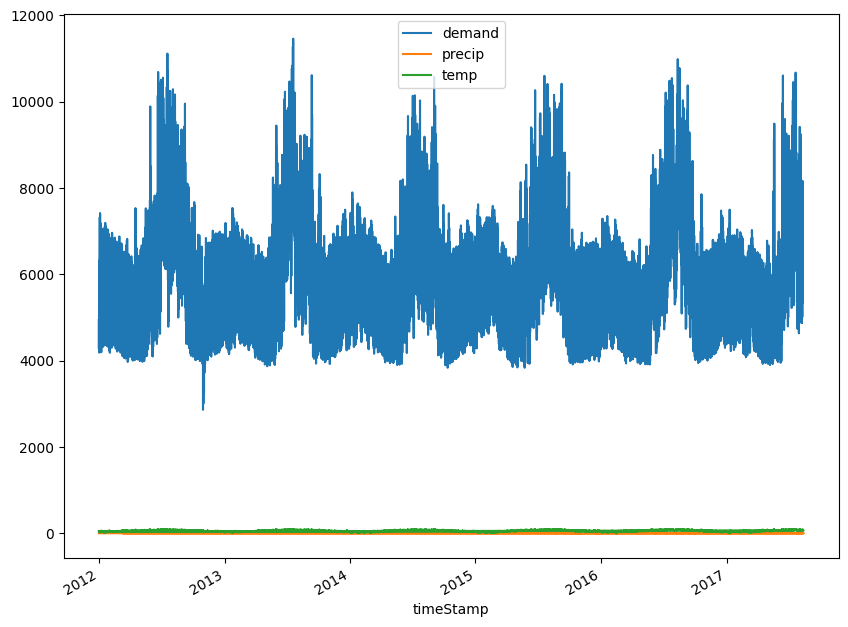

In [10]:
ndf.plot()

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

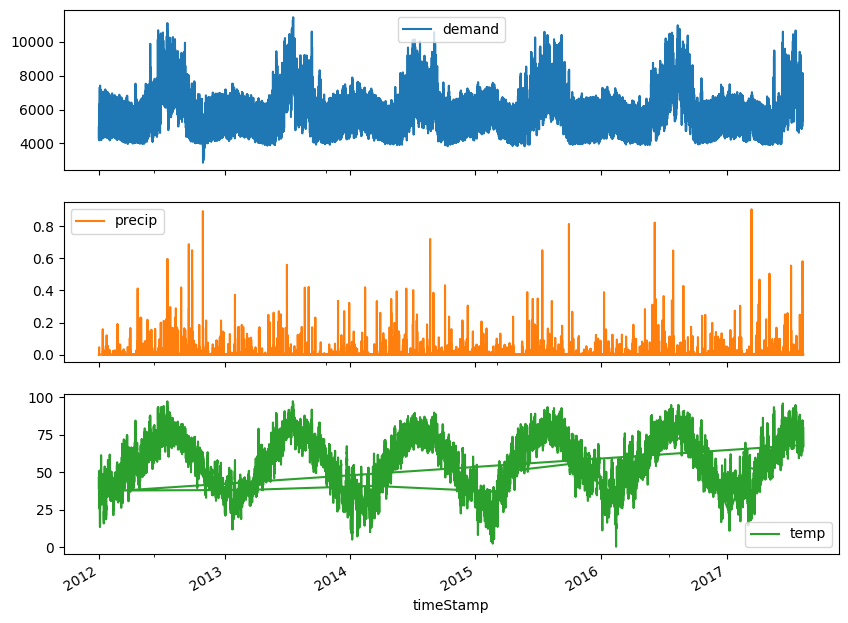

In [11]:
ndf.plot(subplots=True)

In [12]:
ndf.isnull().any()

demand    True
precip    True
temp      True
dtype: bool

In [13]:
ndf.isnull().sum()

demand     81
precip    230
temp      186
dtype: int64

In [14]:
ndf.query('demand != demand')

,demand,precip,temp
timeStamp,,,
2012-03-11 02:00:00,NaN,0.0000,37.78
2013-03-10 02:00:00,NaN,0.0000,38.18
2014-03-09 02:00:00,NaN,0.0000,40.86
2015-03-08 02:00:00,NaN,0.0000,36.96
2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...
2017-08-12 02:00:00,NaN,0.0000,70.84
2017-08-12 03:00:00,NaN,0.0000,70.57
2017-08-12 04:00:00,NaN,0.0000,69.89


In [15]:
ndf['demand'] = ndf['demand'].ffill()
ndf['temp'] = ndf['temp'].ffill()

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

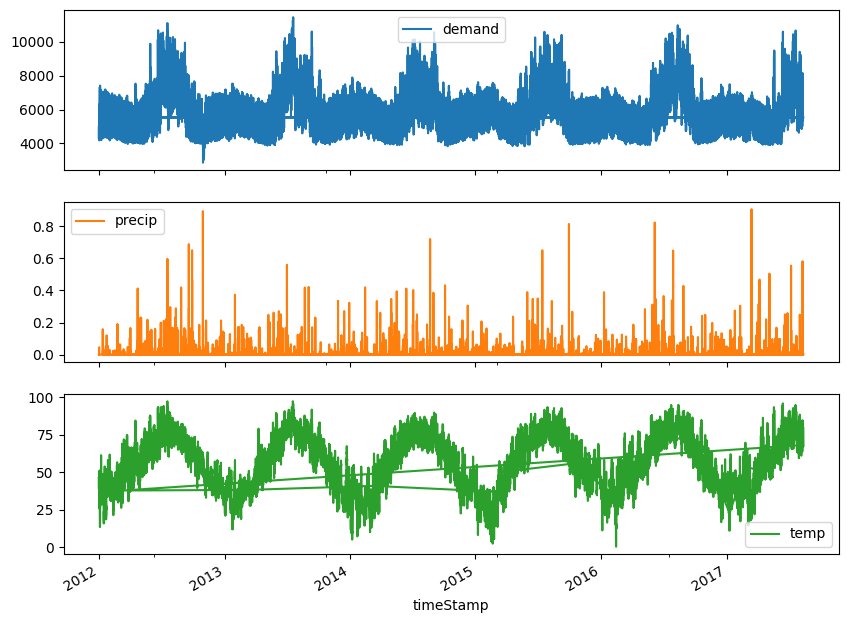

In [16]:
ndf.plot(subplots=True)

In [17]:
ndf.resample('ME').mean()

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

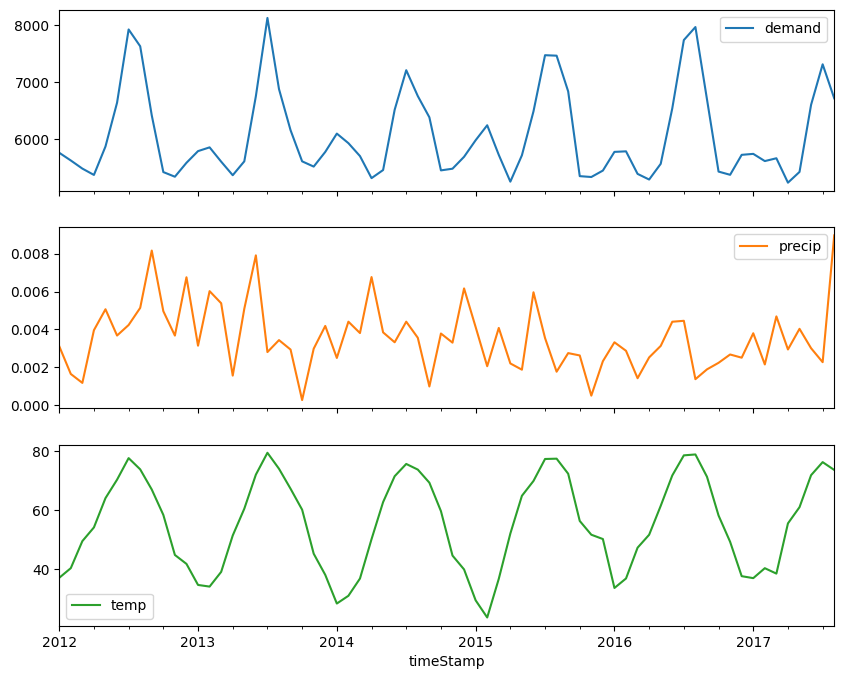

In [18]:
ndf.resample('ME').mean().plot(subplots=True)

In [19]:
month_df = ndf.resample('ME').mean()

In [20]:
month_df

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


p - AutoRegressive (AR) Order:

Definition: The number of lag observations included in the model, i.e., the number of past values that are used to predict the current value.
Interpretation: If p=2, the model uses the last two observations to predict the current value.


d - Degree of Differencing (Integrated):

Definition: The number of times the data have had past values subtracted to make the series stationary (i.e., to remove trends and seasonality).
Interpretation: If d=1, the data are differenced once. This means we use the differences between consecutive observations to model the data

q - Moving Average (MA) Order:

Definition: The number of lagged forecast errors in the prediction equation, i.e., the number of past error terms that are used to predict the current value.
Interpretation: If q=2, the model uses the last two forecast errors to predict the current value.

In [21]:
import pmdarima as pm

#auto- arima search for optimal values of p, d and q itself, that's why auto

model = pm.auto_arima(month_df['demand'], m=12,seasonal=True,start_P=0, start_Q=0,max_order=4,test='adf',
                      error_action='ignore', suppress_warnings=True,stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1025.036, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1028.396, Time=0.91 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1101.718, Time=0.21 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.058, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.06 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1019.169, Time=1.73 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : 

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Sat, 18 May 2024   AIC                            993.144
Time:                                         17:50:24   BIC                           1006.461
Sample:                                     01-31-2012   HQIC                           998.420
                                          - 08-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.258      4.697      0.000    2168.826    5274.418
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.89   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
train = month_df[(month_df.index.get_level_values(0) >= '2013-01-31') & (month_df.index.get_level_values(0) <='2017-04-30')]
test = month_df[(month_df.index.get_level_values(0) > '2017-04-30')]

In [24]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [25]:
model.fit(train['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [26]:
forecast = model.predict(n_periods=4,return_conf_int=True)


In [27]:
forecast

(2017-05-31    5355.341160
 2017-06-30    6235.062495
 2017-07-31    7290.343677
 2017-08-31    7431.069123
 Freq: ME, dtype: float64,
 array([[4748.96707342, 5961.71524577],
        [5426.31404421, 7043.8109457 ],
        [6461.94433471, 8118.74301867],
        [6596.71286722, 8265.42537907]]))

In [28]:
forecast_df = pd.DataFrame(forecast[0],index=test.index,columns=['Prediction'])
forecast_df

,Prediction
timeStamp,
2017-05-31,5355.341160
2017-06-30,6235.062495
2017-07-31,7290.343677
2017-08-31,7431.069123


<Axes: xlabel='timeStamp'>

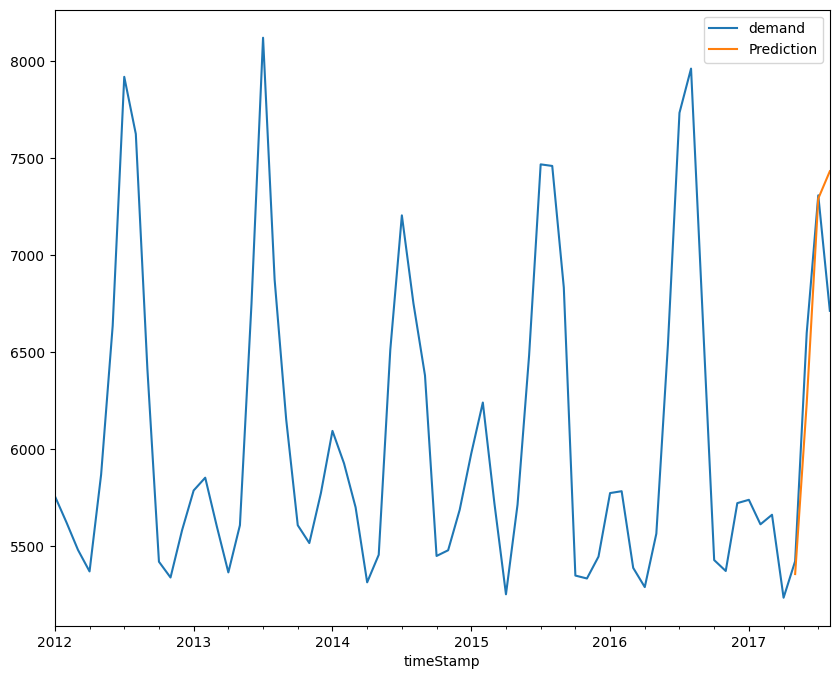

In [29]:
pd.concat([month_df['demand'],forecast_df],axis=1).plot()   #since month_df has other columns too.

In [30]:
#testing even more 


forecast1 = model.predict(min_periods=10,return_conf_int=True)
forecast1

(2017-05-31    5355.341160
 2017-06-30    6235.062495
 2017-07-31    7290.343677
 2017-08-31    7431.069123
 2017-09-30    6431.904653
 2017-10-31    5730.733812
 2017-11-30    5647.334338
 2017-12-31    5941.968041
 2018-01-31    5900.454582
 2018-02-28    5720.513026
 Freq: ME, dtype: float64,
 array([[4748.96707342, 5961.71524577],
        [5426.31404421, 7043.8109457 ],
        [6461.94433471, 8118.74301867],
        [6596.71286722, 8265.42537907],
        [5579.61795724, 7284.1913493 ],
        [4871.95460122, 6589.51302276],
        [4788.76179652, 6505.90687955],
        [5084.62244261, 6799.31363966],
        [5045.07115774, 6755.83800709],
        [4864.97189226, 6576.0541591 ]]))

In [31]:
forecast1[1].shape

(10, 2)

In [32]:
forecast_range = pd.date_range(start='2017-05-31' ,periods=10,freq='ME')

In [33]:
forecast_range

DatetimeIndex(['2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28'],
              dtype='datetime64[ns]', freq='ME')

In [34]:
forecast_df1 = pd.DataFrame(forecast1[0],index=forecast_range,columns=['Prediction'])

<Axes: >

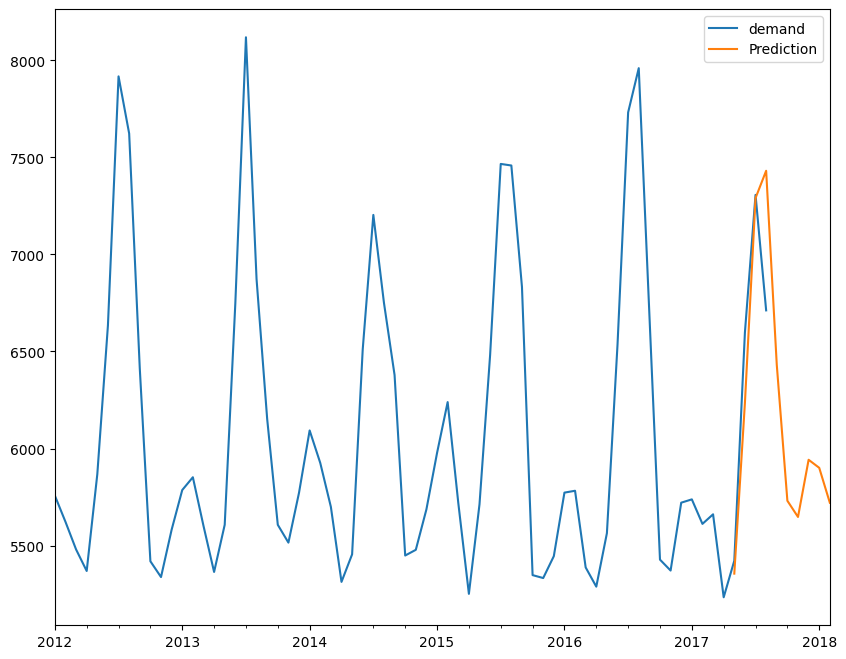

In [35]:
pd.concat([month_df['demand'], forecast_df1], axis=1).plot()

In [36]:
lower = pd.Series(forecast1[1][:,0], index=forecast_range)
upper = pd.Series(forecast1[1][:,1], index=forecast_range)

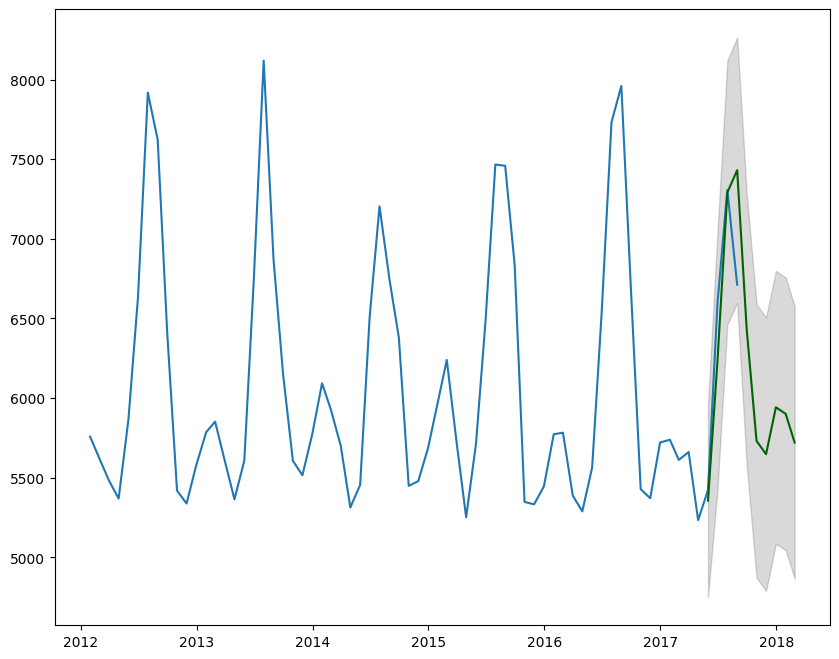

In [37]:
plt.plot(month_df['demand'])
plt.plot(forecast_df1 ,color='darkgreen')
plt.fill_between(forecast_range,lower,upper,color='k', alpha=0.15)

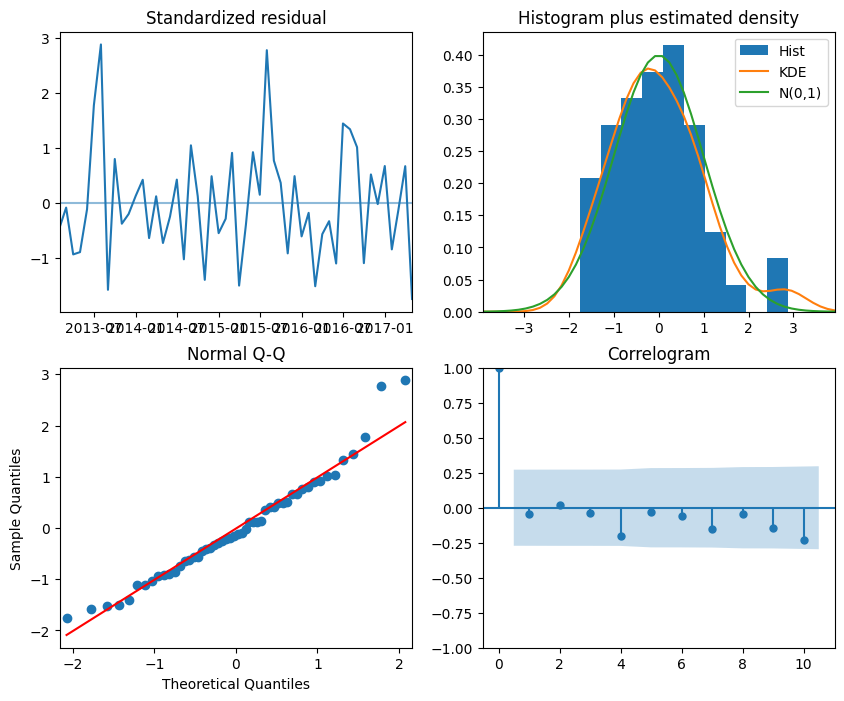

In [38]:
out = model.plot_diagnostics()